In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'forward', 'backward' or 'central'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            central: f(a+h) - f(a-h))/2h
            forward: f(a+h) - f(a))/h
            backward: f(a) - f(a-h))/h            
    '''

In [2]:
def derivative(f,a,method='central',h=0.01):
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

$$f(x)=\frac{7x^3-5x+1}{2x^4+x^2+1} \quad x\in[-5,5]$$

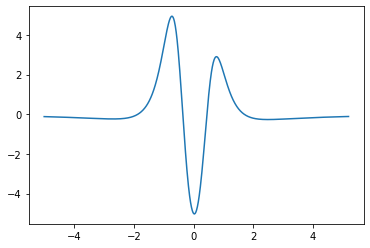

In [15]:
def f(x):
    return (7*x**3-5*x+1)/(2*x**4+x**2+1)
x=np.arange(-5,5.2,0.01)
plt.plot(x,derivative(f,x))


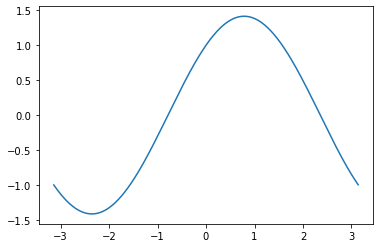

In [63]:
from scipy.misc import derivative

def f(x):
    return np.cos(x)+np.sin(x)

x=np.arange(-np.pi,np.pi,0.01)

plt.plot(x,f(x))

In [65]:
a0 = f(0)
a1 = derivative(f,0,dx=0.001,n=1)
a2 = derivative(f,0,dx=0.001,n=2) / 2
a3 = derivative(f,0,dx=0.001,n=3,order=5) / 6
a4 = derivative(f,0,dx=0.001,n=4,order=7) / 24

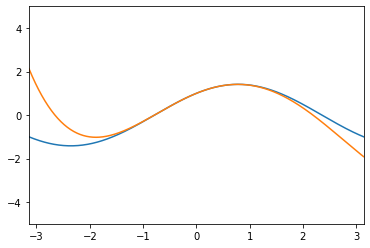

In [68]:
T4 = a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4
plt.plot(x,f(x),x,T4), plt.xlim([-np.pi,np.pi]), plt.ylim([-5,5]);
plt.show()

Q1.Write a function my_num_diff(f,a,b,n,option) with the output as [df,X], where f is a function object.                   
The function my_num_diff should compute the derivative of f numerically for n evenly spaced points                   
starting at a and ending at b, according to the method defined by option.                                                
The input argument option is one of the following strings: "forward", "backward", and "central".                           
Note that for the forward and backward method, the output argument, dy, should be a 1D array of length n −1,             
and for the central difference method dy it should be a 1D array of length n−2.                                             
The function should also output a vector X that is the same size as dy and denotes the x-values for which dy is valid.

The **forward difference** estimates the slope of the function at $x_j$ using the line that connects
$(x_j,f(x_j)) \text{ and } (x_{j+1},f(x_{j+1}))$:
$$f'(x_j) = \frac{f(x_{j+1})−f(x_j)}{x_{j+1} −x_j}$$
The **backward difference** estimates the slope of the function at $x_j$ using the line that connects
$(x_{j−1},f(x_{j−1})) \text{ and } (x_j,f(x_j))$:
$$f'(x_j) = \frac{f(x_j)−f(x_{j-1})}{x_j −x_{j-1}}$$
The **central difference** estimates the slope of the function at $x_j$ using the line that connects
$(x_{j−1},f(x_{j−1})) \text{ and } (x_{j+1},f(x_{j+1}))$:
$$f'(x_j) = \frac{f(x_{j+1})−f(x_{j-1})}{x_{j+1} −x_{j-1}}$$

In [19]:
def my_num_diff(f,a,b,N,option):
    n=N
    x=np.linspace(a,b,n)
    if option == "forward":
        X=x[0:n-1]
        df=(f(x[1:n])-f(x[0:n-1]))/(x[1:n]-x[0:n-1])
    elif option == "backward":
        X=x[1:n]
        df=(f(x[1:n])-f(x[0:n-1]))/(x[1:n]-x[0:n-1])
    else :
        X=x[1:n-1]
        df=(f(x[2:n])-f(x[0:n-2]))/(x[2:n]-x[0:n-2])
    return df,X

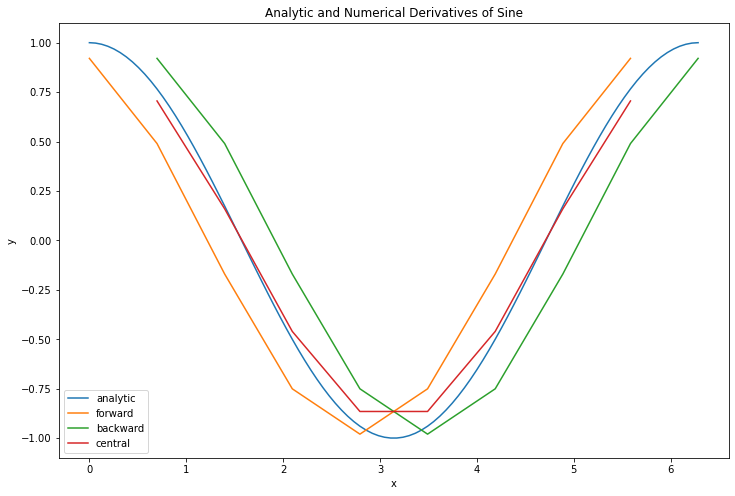

In [20]:
f = lambda x: np.sin(x)
x = np.linspace(0, 2*np.pi, 100)

[dya, Xa] = my_num_diff(f, 0, 2*np.pi, 10, 'forward')
[dyb, Xb] = my_num_diff(f, 0, 2*np.pi, 10, 'backward')
[dyc, Xc] = my_num_diff(f, 0, 2*np.pi, 10, 'central')
plt.figure(figsize = (12, 8))
plt.plot(x, np.cos(x), label = 'analytic')
plt.plot(Xa, dya, label = 'forward')
plt.plot(Xb, dyb, label = 'backward')
plt.plot(Xc, dyc, label = 'central')
plt.legend()
plt.title('Analytic and Numerical Derivatives of Sine')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

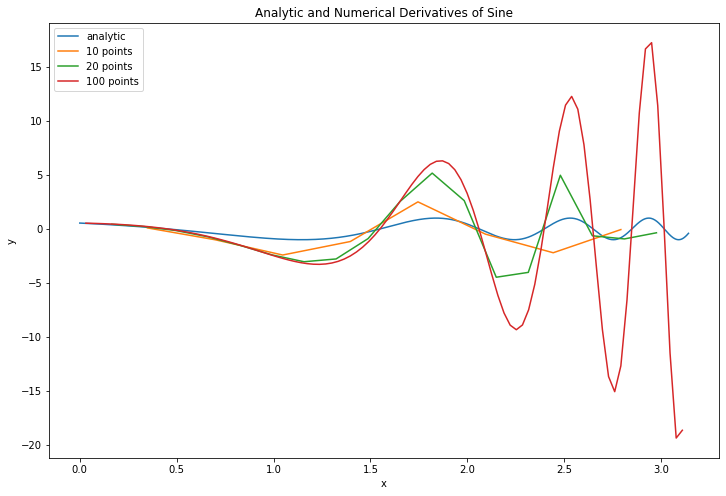

In [21]:
f = lambda x: np.sin(np.exp(x))
x = np.linspace(0, np.pi, 1000)

[dy10, X10] = my_num_diff(f, 0, np.pi, 10, "central")
[dy20, X20] = my_num_diff(f, 0, np.pi, 20, "central")
[dy100, X100] = my_num_diff(f, 0, np.pi, 100, "central")
plt.figure(figsize = (12, 8))
plt.plot(x, np.cos(np.exp(x)), label = "analytic")
plt.plot(X10, dy10, label = "10 points")
plt.plot(X20, dy20, label = "20 points")
plt.plot(X100, dy100, label = "100 points")
plt.legend()
plt.title("Analytic and Numerical Derivatives of Sine")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Q2.Write a function my_num_diff_w_smoothing(x,y,n) with output [dy,X],                                                 
where x and y are a 1D NumPy array of the same length, and n is a strictly positive scalar.                              
The function should first create a vector of “smoothed” y data points where y_smooth[i] = np.mean(y[i-n:i+n]).          
The function should then compute dy, the derivative of the smoothed y-vector, using the central difference method.         
The function should also output a 1D array X that is the same size as dy and denotes the x-values for which dy is valid.   
Assume that the data contained in x is in ascending order with no duplicate entries; it is possible that the elements of x will not be evenly spaced.                                                        
Note that the output dy will have 2n+2 fewer points than y.   
Assume that the length of y is much bigger than 2n+2.

In [22]:
def my_num_diff_w_smoothing(x,y,n):
    x_smooth=x[np.arange(n, len(x)-n,n)]
    def smoothD(x,y,n):
        discrete = np.arange(n+1,len(y)-n,n)
        s=[]
        for k in range(0,len(discrete)):
            i=discrete[k]
            s.append(np.average(y[np.arange(i-n-1,i+n)]))
        return np.array(s)
    
    def central_difference(y,h):
        dy=[]
        for i in range(1,len(y)-1):
            dy.append((y[i+1]-y[i-1])/(2*h))
        return np.array(dy)
    y_smooth=smoothD(x,y,n)
    X=x_smooth[np.arange(1,len(x_smooth)-1)]
    h=(X[len(X)-1]-X[0])/(len(X)-1)
    dy=central_difference(y_smooth,h)
    return (dy,X)

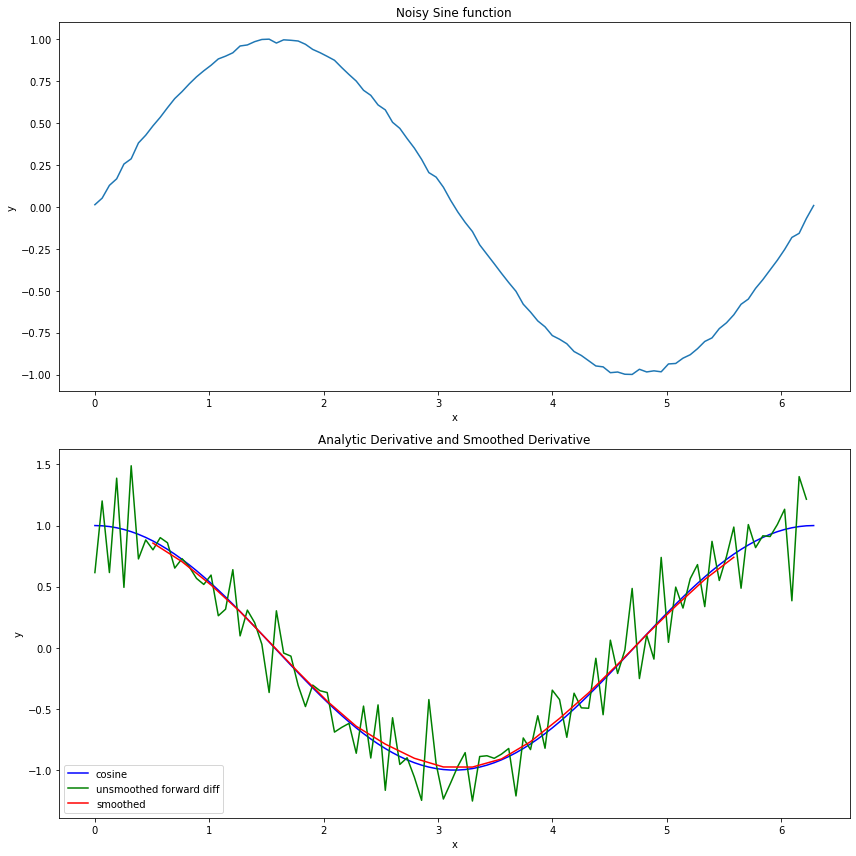

In [23]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.randn(len(x))/100
[dy, X] = my_num_diff_w_smoothing(x, y, 4)
plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.plot(x, y)
plt.title("Noisy Sine function")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(212)
plt.plot(x, np.cos(x), "b", label = "cosine")
plt.plot(x[:-1], (y[1:] - y[:-1])/(x[1]-x[0]), "g", \
label = "unsmoothed forward diff")
plt.plot(X, dy, "r", label = "smoothed")
plt.title("Analytic Derivative and Smoothed Derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()